### Code to run before

python -m venv .env


Command line-ban:    .\.env\Scripts\activate

pip install numpy 


pip install tensorflow


pip install seaborn





In [47]:
# Load in input data (DIY)
import numpy as np

def read_input_data(file_path):
    temp_list = []
    with open(file_path) as f:
        lines=f.readlines()
        for line in lines:
            line = line.split()
            if line:            
                line = [float(numbers) for numbers in line]
                temp_list.append(line)
    return np.array(temp_list)

dummy_A = read_input_data(r'data_source\test_data.txt')

# ------------------------------------------------------------

# Load in input data (Easier way)        
dummy_B = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)


print((dummy_A==dummy_B).all())
print(dummy_A.shape)
print(dummy_B.shape)

True
(100, 2)
(100, 2)


In [48]:
test_data = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)
training_data = np.loadtxt(r'data_source\training_data.txt', delimiter=' ', dtype=float)
validation_data = np.loadtxt(r'data_source\validation_data.txt', delimiter=' ', dtype=float)

<Axes: >

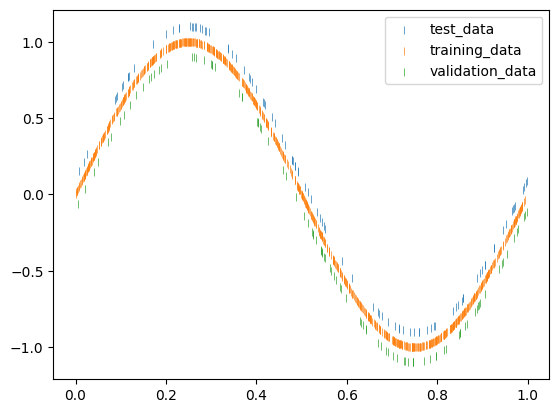

In [49]:
# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = test_data[:,0] ,  y = test_data[:,1] + 0.1   ,marker="|" , label = "test_data" )
sns.scatterplot(x = training_data[:,0] ,  y = training_data[:,1] ,  marker="|" , label = "training_data" )
sns.scatterplot(x = validation_data[:,0] ,  y = validation_data[:,1] - 0.1 ,  marker="|" , label = "validation_data"  )

In [50]:
test_data[ : , 1 ]

array([-0.59413172, -0.45307409, -0.82230611,  0.66874362,  0.22203742,
       -0.95868727,  0.71754437, -0.99999201,  0.11647421,  0.85577203,
        0.27205548,  0.66839621,  0.79208906,  0.50798952,  0.11387754,
        0.88250991,  0.99793372, -0.77891948, -0.53358159,  0.97288834,
       -0.0142831 ,  0.9987619 , -0.08652634, -0.99783273, -0.93279885,
        0.40576434, -0.98564704,  0.08913979, -0.97655003,  0.05415628,
       -0.17814815, -0.97750719,  0.54311298,  0.72668553, -0.20884497,
        0.9914954 ,  0.16348055,  0.99979487,  0.12666053, -0.29603011,
        0.59219933, -0.98617595, -0.86277403,  0.53137383, -0.64653821,
       -0.02648457, -0.30660164, -0.21499142,  0.82102055, -0.332195  ,
       -0.18985417,  0.6037806 , -0.32590131,  0.48379382, -0.88124256,
        0.6783237 ,  0.9953621 ,  0.98372481,  0.12712246, -0.96324784,
       -0.77906334, -0.97392646, -0.896103  ,  0.52085161,  0.63879271,
       -0.87234744,  0.96160156, -0.04910468, -0.56167609,  0.66

In [57]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape = (1,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
 


     
X_train = training_data[:,0]
Y_train = training_data[:,1]
X_val = validation_data[:,0]
Y_val = validation_data[:,1]

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50, batch_size=10, verbose=0)

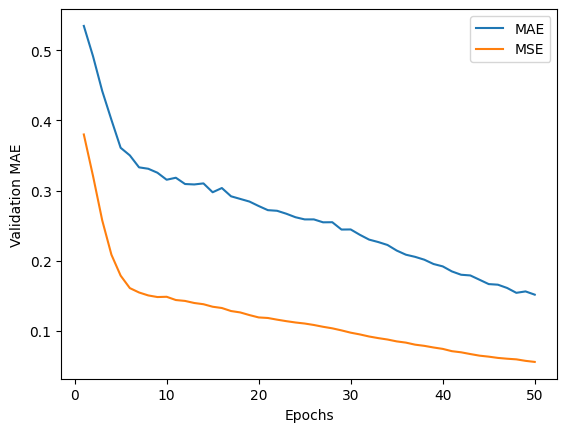

In [56]:
mae_history = history.history["val_mae"]
mse_history = history.history["val_loss"]
plt.plot(range(1, len(mae_history) + 1), mae_history , label = "MAE")
plt.plot(range(1, len(mse_history) + 1), mse_history, label = "MSE")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

In [58]:
test_mse_score, test_mae_score = model.evaluate(test_data[:,0], test_data[:,1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0709


In [ ]:
# Evaulate performance